In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import funciones as fun
%matplotlib qt

# Muestreo
Se recomienda leer a partir de la página 542 del Oppenheim.
## Motivación
Muestrear consiste en tomar puntos de una señal continua, de manera de obtener una señal discreta. Como se vio en las diapositivas del práctico, tiene múltiples aplicaciones. En el teórico del curso se estudió cómo hacer el muestreo de una señal. A continuación se propone hacer un ejemplo en los que aparecen varios de los conceptos vistos: la idea es generar intuición sobre los mismos.  
<br> 
En primer lugar se darán señales sinusoidales muestreadas, es decir discretas. Se busca generar intuición sobre qué tanto dicen sobre la señal continua de las que fueron adquiridas.


Text(0, 0.5, 'Amplitud')

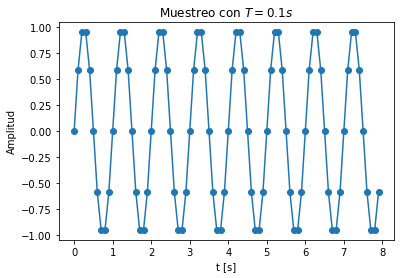

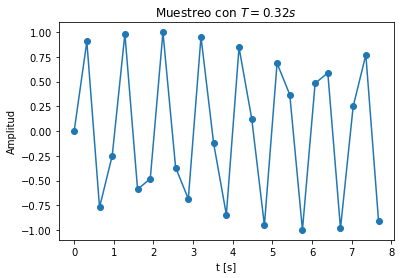

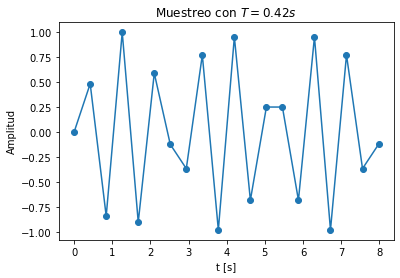

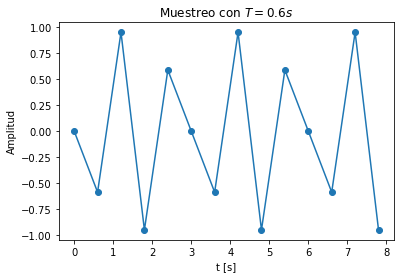

In [2]:
# Genero las señales discretas que voy a usar
t1, t2, t3, t4, s1, s2, s3, s4 = fun.generar_senos_discretos()

# Grafico las señales

# Grafico con T = 0.1
plt.figure()
plt.plot(t1, s1, 'o-')
plt.title('Muestreo con $T = 0.1s$')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')

# Grafico con T = 0.32
plt.figure()
plt.plot(t2, s2, 'o-')
plt.title('Muestreo con $T = 0.32s$')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')

# Grafico con T = 0.42
plt.figure()
plt.plot(t3, s3, 'o-')
plt.title('Muestreo con $T = 0.42s$')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')

# Grafico con T = 0.6
plt.figure()
plt.plot(t4, s4, 'o-')
plt.title('Muestreo con $T = 0.6s$')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')



1. Para cada una de las señales responda:
- ¿Puede intuir la frecuencia de la señal continua?
- ¿En base a la respuesta de la primera pregunta, podría reconstruir la señal continua a partir de las muestras dadas?
2. Sabiendo que todas las señales muestreadas son de un seno de $f=1Hz$ responda:
- ¿Se cumple el teorema de muestreo? ¿Qué implica?
- Usando la interpolación lineal de Python entre las muestras, ¿el gráfico que se obtiene se parece al de la señal continua? Explique por qué.
<br>
Puede ser útil graficar la señal continua junto con las discretas para comparar.
3. ¿Nota que haya señales que cumplan el teorema de muestreo pero parezcan "mal muestreadas", o la señal reconstruida se parezca muy poco a la original? Fundamente.
4. (opcional) Manteniendo la interpolación lineal como forma de reconstrucción, ¿cree que un muestreo no uniforme provocaría obtener una señal reconstruida más parecida a la original?

In [ ]:
#------ESCRIBIR CÓDIGO--------------
# Graficar la señal continua junto con las discretas


## Introducción
" **Bajo ciertas condiciones, una señal continua puede representarse y reconstruirse por completo partiendo del conocimiento de sus valores, o muestras, en puntos igualmente espaciados en el tiempo.** <br>
Esta propiedad un tanto sorprendente se deriva de un resultado básico que se conoce como el teorema del muestreo." Oppenheim pag. 514.
<br>

El teorema de muestreo funciona como puente o nexo entre las señales continuas y discretas. Permite hacer un pasaje de un dominio al otro sin perder información. Esto tiene un potencial enorme: el procesamiento de señales de forma digital cada vez da mejores prestaciones, y muchas veces es de mucha más conveniencia que procesar con un sistema continuo. En las diapositivas de la clase se toca este tema:
[Link](https://docs.google.com/presentation/d/1pk0KTVLsWa7N4SqyTLOegwT0QUMfGYjsSqe_fuIUYzs/edit#slide=id.g25257dc4745_0_14)

5. Dada una señal de frecuencia máxima $f$, ¿cuál es la mínima frecuencia de muestreo $f_{s}$ para muestrear correctamente dicha señal?

## Generalidades y etapas del muestreo
La idea principal es la siguiente:
1. Parto de una señal en tiempo continuo. La muestreo en el tiempo y obtengo una señal discreta.
2. Hago el procesamiento (o transmisión, entre otras) con la señal discreta.
3. Vinculo en frecuencia la señal discreta con la señal continua original. 
4. Analizo si puedo recuperar todas las mismas componentes frecuenciales de la señal continua. 
5. Una vez que tengo el espectro en frecuencia de la señal continua original (que depende del espectro en frecuencia de la señal discreta), uso algún método de reconstrucción para obtener la señal continua a partir de la señal discreta. A su vez también puedo hacer la reconstrucción en el tiempo (usando interpolación).

En la figura que se muestra en lo que sigue, se ilustra la idea y etapas del muestreo. Notar que entran y salen señales continuas ($x_{c}(t)$ y $y_{r}(t)$), pero en la mitad se aplica un sistema en tiempo discreto, esto está directamente vinculado con lo que se comentaba en el párrafo anterior. Si dicho sistema fuera el identidad $y[n] = x[n]$, nos gustaría que $x_{c}(t) = y_{r}(t)$, ya que implicaría que el pasaje de tiempo continuo a discreto y viceversa, no afecta la señal. Esto es importante, a lo largo de todo este proceso vamos a tener esa restricción: la conversión de un dominio a otro, idealmente no debería alterar la señal.

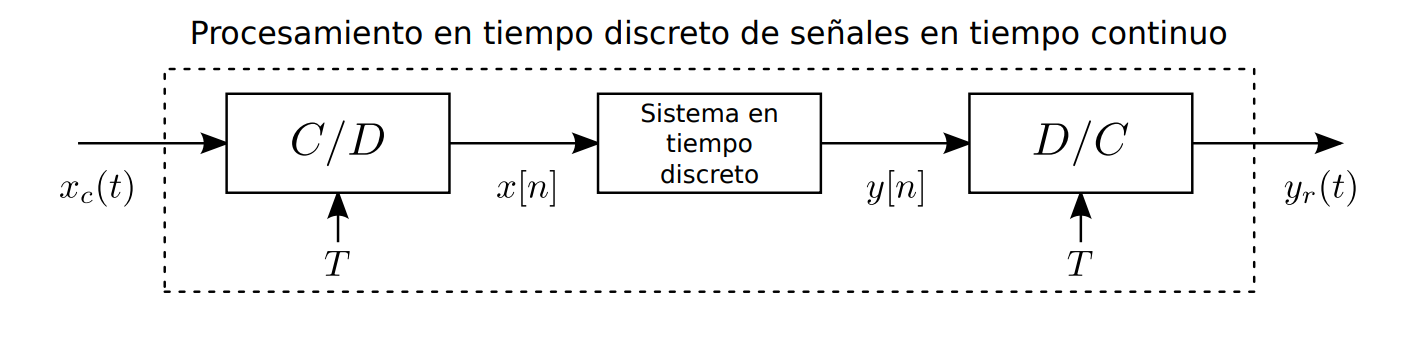
Extraído de slide 32 de teórico (muestreo de señales en tiempo continuo). <br>
En primer lugar nos vamos a enfocar en el primer bloque: la conversión de tiempo continuo a discreto $C/D$. Luego veremos la conversión $D/C$, a la cual también se le llamará reconstrucción.
<br>
<br>
**Hoja de ruta:**
<br>
1. Conversión de tiempo continuo a discreto (C/D).
    - Dominio del tiempo
        - Transformación 1: obtención de $x_{s}(t)$ a partir de $x_{c}(t)$, $s(t)$ y $T$. 
        - Transformación 2: obtención de $x[n]$ a partir de $x_{s}(t)$ y $T$.
    - Dominio de la frecuencia
        - Transformación 1: obtención de $x_{s}(t)$ a partir de $x_{c}(t)$, $s(t)$ y $T$. 
        - Transformación 2: obtención de $x[n]$ a partir de $x_{s}(t)$ y $T$.
    - Unión de la Transformación 1 y 2.
2. Reconstrucción o conversión de tiempo discreto a continuo (D/C).

## Conversión de tiempo continuo a discreto (C/D)
En la figura de a continuación se resumen las etapas de este bloque. 
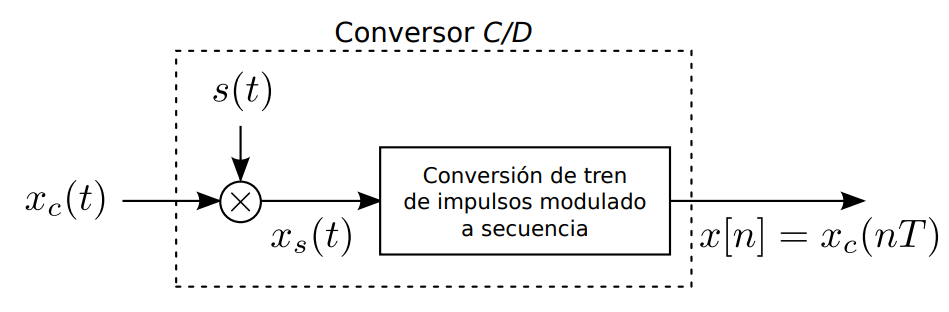

- $x_{c}(t)$ corresponde a la señal continua que se quiere muestrear.
- $s(t)$ es un tren de impulsos de período $T$.
- $x_{d}[n]$ es la señal discreta, donde las muestras se obtienen de $x_{c}(t)$.

<br>
Vamos a dividir este proceso en dos etapas o transformaciones:

1. Obtención de $x_{s}(t)$ a partir de $x_{c}(t)$ y $s(t)$.

2. Obtención de $x_{d}[n]$ a partir de $x_{s}(t)$. 

### Transformación 1: obtención de $x_{s}(t)$ a partir de $x_{c}(t)$, $s(t)$ y $T$.
#### Dominio del tiempo
Consigna: 

6. (prioridad) Explique cómo calcular $x_{s}(t)$ a partir de $x_{c}(t)$ y $s(t)$.

7. Apoyándose en un gráfico (en las slides hay), explique por qué se calcula de esa manera, e interprete el rol de esta señal en el proceso de muestreo.

8. (prioridad) Explique qué papel juega $T$, y qué sucede al agrandarlo o achicarlo.

Respuestas:

Veámoslo en Python.

In [33]:
# Genero una señal sinusoidal 'continua', con gran densidad de puntos: x(t)
#..............................................................................
f = 1.0    # Hz, frecuencia de la señal
fsc = 200  # Hz, frecuencia de muestreo densa
Tc = 1/fsc
ti = 0   # Tiempo de inicio
tf = 8    # Tiempo de fin
t = fun.crear_tiempo(1/fsc, ti, tf)
x = np.sin(2*np.pi*f*t)   # Señal sinusoidal 'continua'
plt.figure()
plt.plot(t, x)
plt.title('Señal continua a muestrear $x_{c}(t)$')
plt.xlabel('t(s)')
plt.ylabel('Amplitud')

# Tren de impulsos: p(t)
T = 0.32 # periodo de muestreo
s = np.zeros(len(t))  # defino la senal tren de impulsos p(t)
n = np.arange(0, int(tf/T))  # este vector tiene la cantidad de impulsos que va a tener p(t)

s[n*int(T*fsc)] = 1  # T*fsc me da en unidad de muestras, donde esta ubicado T

plt.figure()
plt.stem(t, s, basefmt='r-', linefmt='r-', markerfmt='ro')
plt.title('Tren de impulsos $s(t)$ de período $T = '+ str(T) +'s$')
plt.xlabel('t(s)')
plt.ylabel('Amplitud')

# Calculo de xs(t)
xs = x*s

plt.figure()
plt.stem(t, s, basefmt='r-', linefmt='r-', markerfmt='ro', label = '$s(t)$')
plt.plot(t, x, label = '$x_{c}(t)$', color = 'green')
plt.stem(t, xs, label = '$x_{s}(t)$')
plt.title('$x_{c}(t)$, $s(t)$ y $x_{s}(t)$, con $T = '+ str(T) +'s$')
plt.plot(n*T, xs[n*int(T*fsc)], color = 'grey', linestyle = '--')
plt.xlabel('t(s)')
plt.ylabel('Amplitud')
plt.legend()

Consigna:

9. Lo que se ve en las figuras, ¿se corresponde con lo que se esperaba teóricamente (con la explicado en las preguntas anteriores)? 

10. (opcional) Variar $T$. ¿Qué efecto tiene sobre $x_{s}(t)$? Explicar cómo afecta esto en el proceso de muestreo. 


### Transformación 2: obtención de $x[n]$ a partir de $x_{s}(t)$ y $T$.
#### Dominio del tiempo
Consigna:

11. (prioridad) Escriba la expresión que vincula: $x[n]$ y $x_{s}(t)$,  $x[n]$ y $x_{c}(t)$. 

12. Apoyándose en un gráfico (en las slides hay), explique por qué se calcula de esa manera, qué diferencias y similitudes encuentra entre estas señales, e interprete el rol de esta señal en el proceso de muestreo.

Hagamos un ejercicio en Python usando considerando ambas transformaciones.
<br>
Al igual que en el ejercicio anterior, se va a usar una señal continua sinusoidal de frecuencia $1Hz$, $8s$ de duración total, y $0.005s$ de paso. Notar que no es estrictamente continua pues tiene un paso. Al estar trabajando en una computadora, es imposible que la señal sea continua, pero al elegir un paso chico, podemos considerarla aproxidamente continua. 

13. Definir el eje de tiempo $t$, comenzando en $0s$ y definir la señal sinusoidal $s$ con las características mencionadas.

In [ ]:
#-------COMPLETAR CÓDIGO---------------

# Paso del eje de tiempo
# Tc = ...

# Defino eje de tiempo
# t = ...

# Defino señal
# s = ...

#------FIN COMPELTAR CÓDIGO----------------

plt.figure()
plt.plot(t, s)
plt.xlabel('t (s)')
plt.ylabel('Amplitud')
plt.title('Señal continua creada por el estudiante')

t_comp, s_1 = fun.generar_seno()
plt.figure()
plt.plot(t_comp, s_comp)
plt.xlabel('t (s)')
plt.ylabel('Amplitud')
plt.title('Señal continua modelo')

14. Muestrearlos (obtener $x[n]$ a partir de $x_{c}(t)$) con diferentes valores de $T$ ($0.32s$ y $0.1s$ por ejemplo). ¿Qué papel juega $T$? Interpretar los resultados considerando el teorema de muestreo. Para ello puede ser útil graficar $x_{c}(t)$ junto a $x[n]$, dejando que Python haga la interpolación lineal por defecto, como se muestra en la figura que sigue.

Muestrear a la tasa minima y discutir los resultados.
Muestrear a una tasa que de mejores resultados.

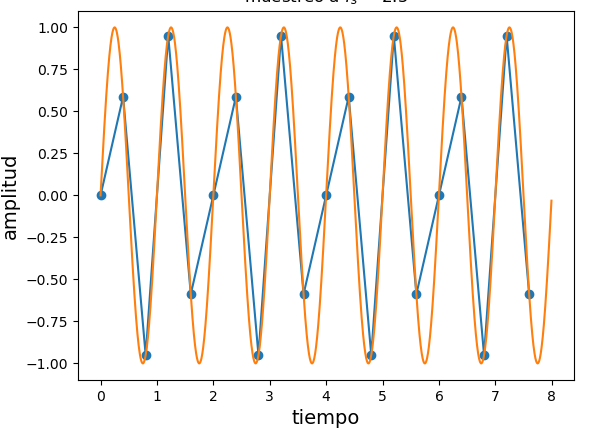


**Ya vimos ambas transformaciones en el dominio del tiempo, ahora vamos a hacerlo en frecuencia.**

### Transformación 1: obtención de $x_{s}(t)$ a partir de $x_{c}(t)$, $s(t)$ y $T$.
#### Dominio de la frecuencia
Como en este transformación solo están involucradas señales en tiempo continuo, vamos a usar la Transformada de Fourier en tiempo continuo.<br>
Definamos notación:
- Al eje de frecuencia que obtenemos al hacer la transformada de Fourier en tiempo continuo, lo escribimos como $\Omega$.
- Definimos $\Omega_{s} = 2\pi / T$, la cual corresponde a la frecuencia del muestreo (cada cuánto tomamos una muestra de $x_{c}(t)$).
- Definamos las trasnformadas de Fourier en tiempo continuo de las funciones que tenemos hasta ahora:

\begin{equation}
x_{c}(t) \overset{CTFT}{\longrightarrow} X_{c}(j\Omega)
\end{equation}

\begin{equation}
s(t) \overset{CTFT}{\longrightarrow} S(j\Omega)
\end{equation}

\begin{equation}
x_{s}(t) \overset{CTFT}{\longrightarrow} X_{s}(j\Omega)
\end{equation}

Consigna:

15. (prioridad) Escribir la expresión que vincula $X_{s}(j\Omega)$ y $X_{c}(j\Omega)$.
\begin{equation}
\sum_{k = }^{k = }X(j(\Omega))
\end{equation}

16. Explicar resumidamente los pasos para llegar a este resultado, detallando qué causa cada característica de la ecuación (escalamiento, creación de copias, etc). Más allá de la explicación más formal, también puede ser útil decirlo en criollo: "para obtener $X_{s}(j\Omega)$, agarro $X_{c}(j\Omega)$ y hago tal y tal cosa...".

17. Explicar cómo se vincula el teorema de muestreo con el resultado de la pregunta anterior. Se recomienda apoyarse en un gráfico de $X_{s}(j\Omega)$ (en las slides de teórico hay).

18. En el teórico, se vio que es posible recuperar $X_{c}(j\Omega)$ a partir de $X_{s}(j\Omega)$, con la utilización de un filtro. Explique cómo es esto, con apoyo en las respuestas de las preguntas anteriores y en un gráfico que ilustre este procedimiento (en las slides de teórico hay).

Veámoslo en un ejemplo usando Python.


## Ejemplo
Voy a trabajar con una combinación lineal de cosenos de: $0Hz, 1Hz, 2Hz, 3Hz, 4Hz$. Poseen las siguientes amplitudes respectivamente: $1, 1.6, 1.2, 0.8, 0.4$.<br>
**Consigna: completar**

In [34]:
# Datos de la senal xc que voy a usar en este ejemplo
w_cos = [0, 1, 2, 3, 4]
w_cos = np.array(w_cos)*2*np.pi  # frecuencias angulares de las componentes de la senal
amp_cos = [1, 1.6, 1.2, 0.8, 0.4]  # amplitudes 

# OPCIONAL
#------------------- EMPIEZA ESPACIO PARA COMPLETAR CODIGO ----------------------------------------------

# Volver a definir el mismo eje de tiempo usando en 8)
# t = ...

# Construyo la senal xc a utilizar en este ejemplo usando w_cos y amp_cos
#xc = ...

# Calcular la fft de xc
#transf_xc = ...

# Crear un eje de frecuencia para la fft
#freq = ...

#------------------- TERMINA ESPACIO PARA COMPLETAR CODIGO ----------------------------------------------

if 0:
    plt.figure()
    plt.plot(t, xc)
    plt.xlabel('t(s)')
    plt.ylabel('Amplitud')
    plt.title('$x_{c}(t)$')

    plt.figure()
    plt.stem(freq, transf_xc)
    plt.axis([-10, 10, -0.1, 1.1])
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.title('fft de $x_{c}(t)$')


A continuación se generan y grafican las señales que se piden crear como consigna, de forma de chequear si se procedió de la manera correcta.

In [35]:
t = fun.crear_tiempo()
xc = fun.crear_xc(w_cos, amp_cos, t)
freq, transf_xc = fun.fft_xc(t, Tc, xc)

plt.figure()
plt.plot(t, xc)
plt.xlabel('t(s)')
plt.ylabel('Amplitud')
plt.title('$x_{c}(t)$')

plt.figure()
plt.stem(freq, transf_xc)
plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('fft de $x_{c}(t)$')

C:\Users\Manu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Manu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'fft de $x_{c}(t)$')

Consigna:

19. ¿Se obtuvo el resultado esperado? Explique.

De ahora en adelante, se trabajará con las últimas señales generadas para evitar errores.<br>

Vuelvo a traer mi tren de impulsos:

In [36]:
# Tren de impulsos: s(t)
T = 0.1 # periodo de muestreo
s = np.zeros(len(t))  # defino la senal tren de impulsos s(t)
n = np.arange(0, int(tf/T))  # este vector tiene la cantidad de impulsos que va a tener s(t)

s[n*int(T*fsc)] = 1  # T*fsc me da en unidad de muestras, donde esta ubicado T

plt.figure()
plt.stem(t, s, basefmt='r-', linefmt='r-', markerfmt='ro')
plt.title('Tren de impulsos $s(t)$ de período $T = '+ str(T) +'s$')
plt.xlabel('t(s)')
plt.ylabel('Amplitud')

Text(0, 0.5, 'Amplitud')

Voy a calcular $x_{s}(t) = x_{c}(t)s(t)$ para este caso.

In [37]:
# Calculo de xs(t)
xs = xc*s

plt.figure()
plt.stem(t, s, basefmt='r-', linefmt='r-', markerfmt='ro', label = '$s(t)$')
plt.plot(t, xc, label = '$x_{c}(t)$', color = 'green')
plt.stem(t, xs, label = '$x_{s}(t)$')
plt.title('$x_{c}(t)$, $s(t)$ y $x_{s}(t)$, con $T = '+ str(T) +'s$')
plt.plot(n*T, xs[n*int(T*fsc)], color = 'grey', linestyle = '--')
plt.xlabel('t(s)')
plt.ylabel('Amplitud')
plt.legend()

# con zoom
plt.figure()
plt.stem(t, s, basefmt='r-', linefmt='r-', markerfmt='ro', label = '$s(t)$')
plt.plot(t, xc, label = '$x_{c}(t)$', color = 'green')
plt.stem(t, xs, label = '$x_{s}(t)$')
plt.title('$x_{c}(t)$, $s(t)$ y $x_{s}(t)$, con $T = '+ str(T) +'s$')
plt.plot(n*T, xs[n*int(T*fsc)], color = 'grey', linestyle = '--')
plt.xlabel('t(s)')
plt.ylabel('Amplitud')
plt.axis([0, 1.18, -0.1, 5.1])

plt.legend()

**Consigna:**

20. ¿El resultado es el esperado? Fundamente.

21. ¿Se cumple el teorema de muestreo? Explique.

En lo que sigue, vamos a ver qué sucede en frecuencia. Se recomienda en este momento repasar qué es lo que se espera ver.

In [38]:
# fft de s(t)
freq = np.fft.fftfreq(len(t), d=1/fsc)
transf_s = np.fft.fft(s, norm = 'forward')

plt.figure()
plt.stem(freq, transf_s)
#plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('fft de s(t)')

# fft de xs(t)
freq = np.fft.fftfreq(len(t), d=1/fsc)
transf_xs = np.fft.fft(xs, norm = 'forward')

plt.figure()
plt.stem(freq, transf_xs*fsc)  # si la multiplico por fsc la amplitud me da bien
#plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('$X_{s}(j\Omega)$')

plt.figure()
plt.stem(freq, transf_xs*fsc)
plt.axis([-10, 10, -0.1, 11])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('$X_{s}(j\Omega)$ zoom')

transf_xs = transf_xs*fsc

C:\Users\Manu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Manu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Manu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Manu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


**Consigna:**

22. ¿Estos resultados son los esperados? Fundamente. Se recomienda apoyarse en la pregunta 10).

23. A continuación voy a aplicar un filtro para obtener $X_{c}(j\Omega)$ a partir de $X_{s}(j\Omega)$. Con base en lo respondido en la pregunta 13), ¿qué tipo de filtro se debería usar, y qué frecuencia de corte es conveniente elegir?



In [48]:
orden = 10
frecuencias, respuesta = fun.generar_filtro(transf_xs, fsc, orden)
respuesta = respuesta*np.exp(1j*2*np.pi*frecuencias*0.22)
plt.figure()
plt.plot(frecuencias, np.abs(respuesta))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Respuesta en frecuencia del pasabajos $H(j\Omega)$')
plt.axis([-25, 25, -0.1, 1.1])

(-25.0, 25.0, -0.1, 1.1)

El filtro pasabajos $H(j\Omega)$ no es ideal, pero se hizo de orden alto para que funcionara lo mejor posible.
Luego de aplicar el pasabajos $H(j\Omega)$, vamos a decir que obtenemos una señal reconstruida $x_{r}(t)$. Idealmente, nos gustaría que fuera igual a $x_{c}(t)$. En frecuencia, vamos a notarla como $X_{r}(j\Omega)$.

**Consigna:**

24. Escribir la expresión de $X_{r}(j\Omega)$ en función de $H(j\Omega)$ y $X_{s}(j\Omega)$. Si no se hizo antes, explicar el fundamento detrás de este cálculo.

Veámoslo en Python.

In [51]:
transf_xs = np.fft.fftshift(transf_xs)
freq_lin = np.linspace(-0.5, 0.5, len(transf_xs))*fsc
Xr_jw = respuesta*transf_xs

plt.figure()
plt.stem(freq_lin, np.abs(Xr_jw))
plt.axis([-10, 10, -0.1, 11])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')


Text(0, 0.5, 'Amplitud')

**Consigna:**

25. ¿El resultado se corresponde con lo esperado? Fundamente. Puede ser útil comparar contra el gráfico de $X_{c}(j\Omega)$.

Ahora hagamos la reconstrucción en el tiempo para generar $x_{r}(t)$.

In [50]:
Xr_jw = np.fft.fftshift(Xr_jw)

re = np.fft.ifft(Xr_jw)*len(t)

plt.figure()
plt.plot(t, re.real*T)
plt.plot(t, xc)
plt.xlabel('t(s)')
plt.ylabel('Amplitud')
plt.title('$x_{r}(t)$')
plt.legend(['reconstruida', 'original'])

**Consigna:**

26. ¿El resultado se corresponde con lo esperado? Fundamente. Puede ser útil graficar juntas $x_{c}(t)$ y $x_{r}(t)$. 

27. Modifique el orden del filtro $H(j\Omega)$. Analice qué sucede en tiempo y frecuencia.

### Transformación 2: obtención de $x[n]$ a partir de $x_{s}(t)$ y $T$.
Como se vio, es posible pasar de $x_{c}(t)$ a  $x_{s}(t)$, y luego hacer en camino inverso usando un filtro pasabajos. Ahora estudiaremos el pasaje de $x_{s}(t)$ (y por lo tanto de $x_{c}(t)$) a $x[n]$, lo cual implica ir de tiempo continuo a tiempo discreto.
#### Dominio de frecuencia
Definamos:
\begin{equation}
x[n] \overset{DTFT}{\longrightarrow} X_{d}(e^{j\omega})\text{,} \quad \text{donde $\omega$ es el eje de frecuencia de la DTFT}
\end{equation}
Según lo visto en las notas, se tiene que:
\begin{equation}
X_{d}(e^{j\omega}) = X_{s}(j\Omega)\text{,} \quad \text{con } \omega = \Omega T
\end{equation}
Es importante notar que lo único que hay que hacer es cambiar el eje de frecuencia.


**Consigna:**

28. (prioridad) Explique con sus palabras cómo pasaría de $X_{d}(e^{j\omega})$ a $X_{s}(j\Omega)$. 

### Unión de las dos transformaciones
En base a lo anterior, es posible vincular $X_{d}(e^{j\omega})$ y $X_{c}(j\Omega)$, lo cual luego me va a permitir calcular la señal recontruida $y_r(t)$ aplicando algún método de recontrucción sobre $X_{c}(j\Omega)$. 

**Consigna:**

29. (prioridad) Escriba la expresión que vincula $X_{d}(e^{j\omega})$ y $X_{c}(j\Omega)$.

Text(0.5, 1.0, 'Comparación $x_c(t)$ y $x[n]$')

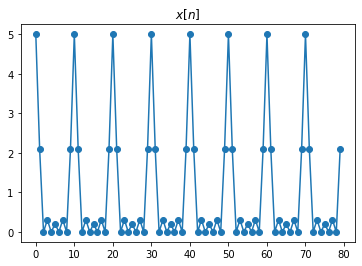

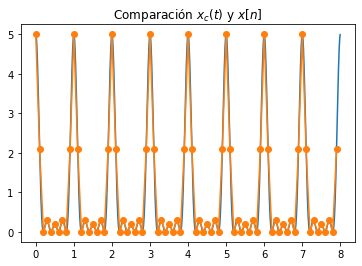

In [34]:
# Parto de xc y t
# Voy a muestrear xc, es decir calcular x[n] con T = 0.1
T = 0.1
cant_muestras = T/Tc
largo_n = int(len(xc)/cant_muestras)
xn = []
for i in range(largo_n):
    muestra = int(i*cant_muestras)
    xn.append(xc[muestra])
n = np.arange(len(xn))

plt.figure()
plt.plot(n, xn, '-o')
plt.title('$x[n]$')

plt.figure()
plt.plot(t, xc)
plt.plot(n*T, xn, '-o')
plt.title('Comparación $x_c(t)$ y $x[n]$')



En el bloque de código anterior se hizo un muestreo de la señal $x_c(t)$. Metodológicamente es fácil de hacer, simplemente guardar un valor de la señal continua cada determinada cantidad de tiempo. Se puede ver que arroja un resultado con que tiene similitudes con $x_s(t)$.
<br>
**Consigna:**

30. Analice esa última frase, y evalúe desde el punto de vista metodológico qué es más fácil hacer.

C:\Users\Manu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, '$X_{d}(e^{j\\omega})$')

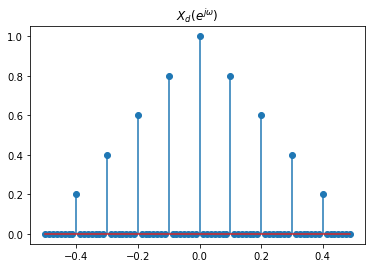

In [44]:
# fft de x[n]
freq = np.fft.fftfreq(len(n), d=1)

transf_xn = np.fft.fft(xn, norm = 'forward')
plt.figure()
plt.stem(freq, transf_xn)
plt.title('$X_{d}(e^{j\omega})$')

**Consigna:**

31. Analice el resultado de $X_{d}(e^{j\omega})$.
<br>
32. (opcional) Copie el bloque de código anterior y modifique el eje de frencuencia para obtener $X_{s}(j\Omega)$.

In [ ]:
# Resolucion

## Reconstrucción o conversión de tiempo discreto a continuo (D/C)
Como se vio en el teórico, hacer la reconstrucción o conversión D/C corresponde a: en el tiempo hacer una interpolación, y en frecuencia a aplicar un filtro pasabajos, como se hizo en el ejemplo de más arriba. Se van a ver ambas.
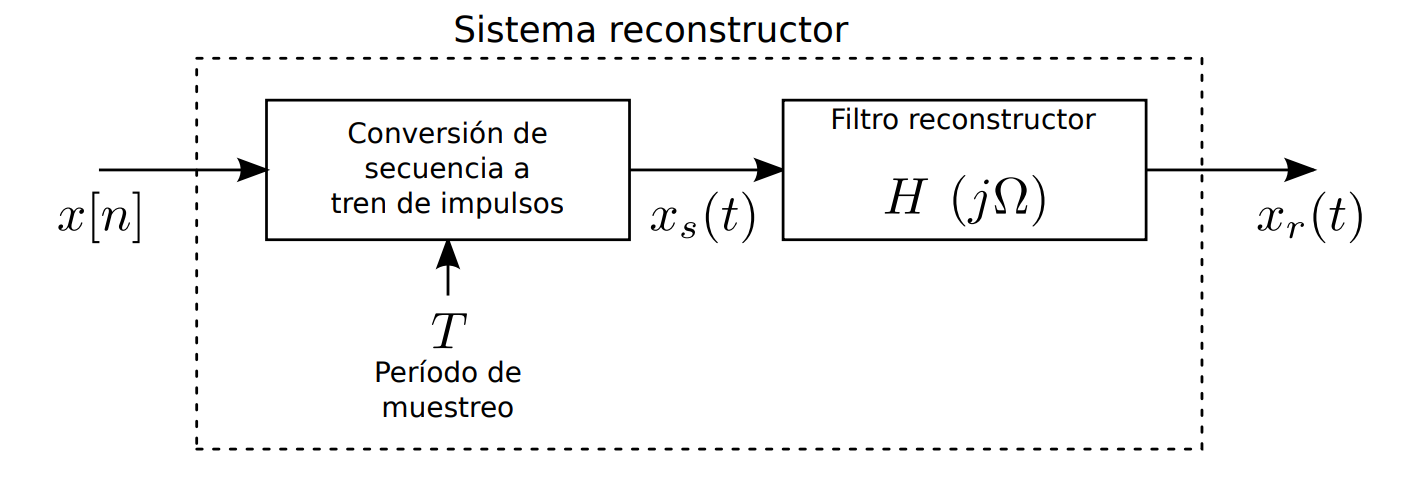

Existen muchas formas de interpolar. Por simplicidad, en principio vamos a interpolar con polinomios:
- Mantenedor de orden 0.
- Interpolación lineal.

#### Mantenedor de orden 0

**Consigna:**

33. Escriba la expresión de la señal reconstruida $x_r(t)$ usando el mantenedor de orden 0. Para ello, va a ser necesario definir $h_0(t)$ (mirar las notas del curso).

34. Escriba la expresión en frecuencia del reconstructor $|H_0(j \Omega)|$.

35. A continuación se muestra la respuesta en frecuencia de este reconstructor. Indique si le parece que el reconstructor va a funcionar bien y justifique. Puede usar el concepto de aliasing.
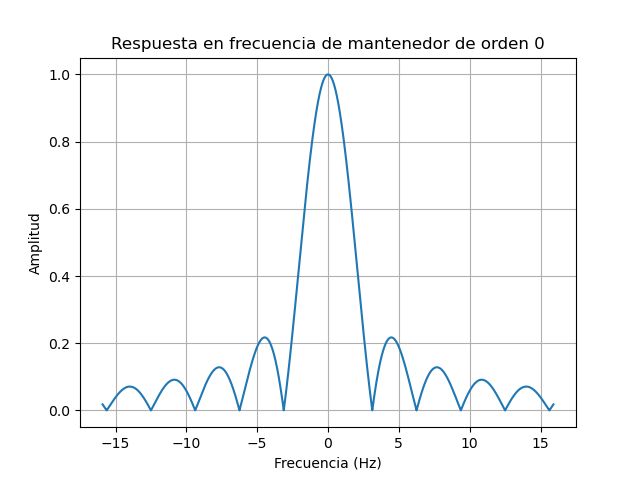

Respuestas:
<br>

#### Interpolación lineal
**Consigna:**

36. Escriba la expresión de la señal reconstruida $x_r(t)$ usando interpolación lineal. Para ello, va a ser necesario definir $h_1(t)$ (mirar las notas del curso).

37. Escriba la expresión en frecuencia del reconstructor $|H_1(j \Omega)|$.

38. A continuación se muestra la respuesta en frecuencia de este reconstructor. Indique si le parece que el reconstructor va a funcionar bien y justifique.
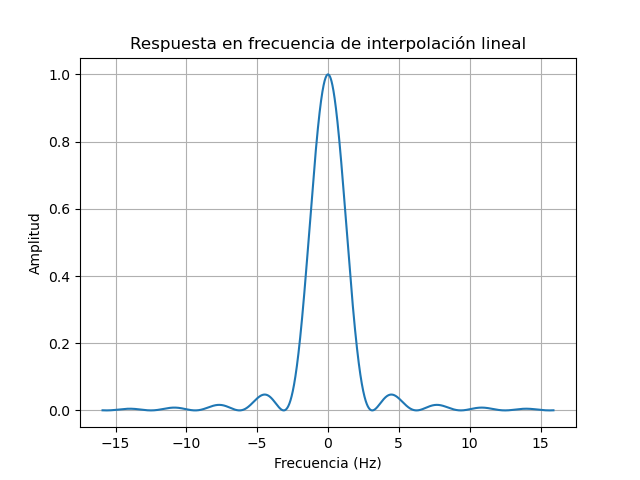

Respuesta:

39. A partir de la siguiente gráfica, compare el comportamiento de los reconstructores.

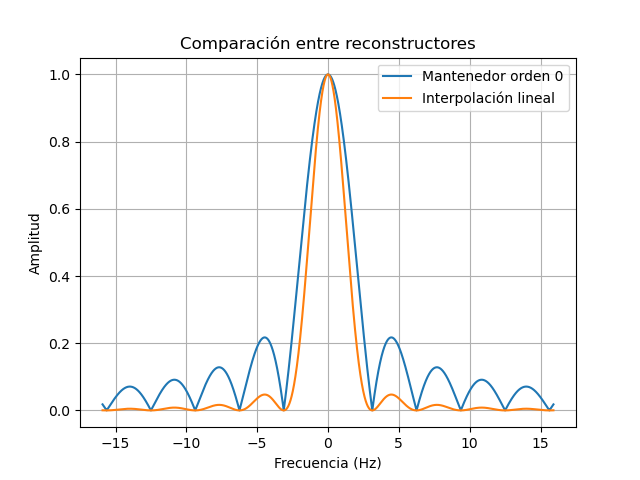

Respuesta:

### Ejemplo: conversión D/C con distintos interpoladores
En este ejemplo vamos a hacer la conversión D/C de distintas maneras y comparar los resultados.
Vamos a usar la misma señal que en el ejemplo anterior.

In [ ]:
# Datos de la senal xc que voy a usar en este ejemplo
w_cos = [0, 1, 2, 3, 4]
w_cos = np.array(w_cos)*2*np.pi  # frecuencias angulares de las componentes de la senal
amp_cos = [1, 1.6, 1.2, 0.8, 0.4]  # amplitudes 

t = fun.crear_tiempo()
xc = fun.crear_xc(w_cos, amp_cos, t)
freq, transf_xc = fun.fft_xc(t, Tc, xc)

plt.figure()
plt.plot(t, xc)
plt.xlabel('t(s)')
plt.ylabel('Amplitud')
plt.title('$x_{c}(t)$')

plt.figure()
plt.stem(freq, transf_xc)
plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('fft de $x_{c}(t)$')

En primer lugar vamos a obtener la señal muestreada con $T=0.1s$ tal como hicimos previamente.

Text(0.5, 1.0, 'Comparación $x_c(t)$ y $x[n]$')

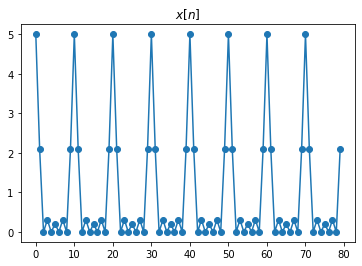

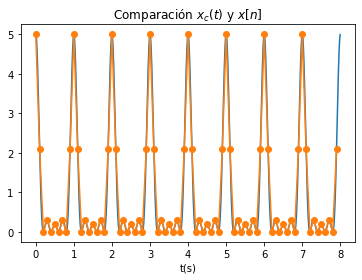

In [4]:
# Parto de xc y t
# Voy a muestrear xc, es decir calcular x[n] con T = 0.1
T = 0.1
cant_muestras = T/Tc
largo_n = int(len(xc)/cant_muestras)
xn = []
for i in range(largo_n):
    muestra = int(i*cant_muestras)
    xn.append(xc[muestra])
n = np.arange(len(xn))

plt.figure()
plt.plot(n, xn, '-o')
plt.title('$x[n]$')

plt.figure()
plt.plot(t, xc)
plt.plot(n*T, xn, '-o')
plt.xlabel('t(s)')
plt.title('Comparación $x_c(t)$ y $x[n]$')

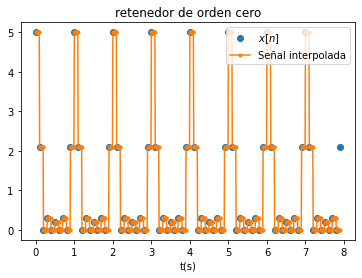

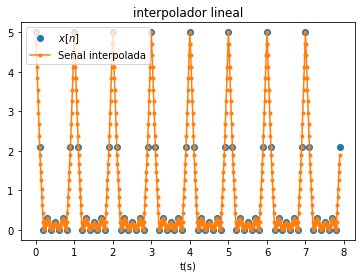

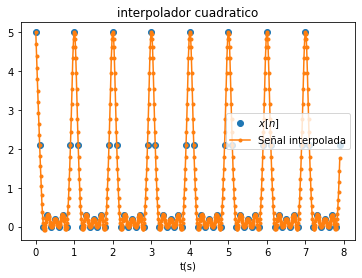

In [5]:
%matplotlib qt
# Hago interpolaciones en el tiempo usando funciones de Python
L=10
fs = 1/T
#zero
orden = 'zero'
x_int, y_zero = fun.interpolacion(xn, L, fs, orden)

plt.figure()
#plt.plot(t, xc)
plt.plot(n*T, xn, 'o')
plt.plot(x_int, y_zero, '.-')
plt.title('retenedor de orden cero')
plt.xlabel('t(s)')
plt.legend(['$x[n]$', 'Señal interpolada'])


#Lineal

orden = 'linear'
xnew, y_linear = fun.interpolacion(xn, L, fs, orden)

plt.figure()
# plt.plot(t, x, 'o')
plt.plot(n*T, xn, 'o')
plt.plot(xnew, y_linear, '.-')
plt.title('interpolador lineal')
plt.xlabel('t(s)')
plt.legend(['$x[n]$', 'Señal interpolada'])

#Cuadratico
orden = 'quadratic'
xnew, y_quadratic = fun.interpolacion(xn, L, fs, orden)

plt.figure()
# plt.plot(t, x, 'o')
plt.plot(n*T, xn, 'o')
plt.plot(xnew, y_quadratic, '.-')
plt.title('interpolador cuadratico')
plt.xlabel('t(s)')
plt.legend(['$x[n]$', 'Señal interpolada'])


40. ¿Considera que son buenos interpoladores? Ordénelos por su performance y vincule esto a la respuestas en frecuencia vistas anteriormente. ¿Cómo cree que se va a comportar en frecuencia el interpolador cuadrático?